In [1]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import pandas as pd
from svm import*
from svmutil import *

In [2]:
data_train = pd.read_csv("data_train.csv")
data_test = pd.read_csv("data_test.csv")
X = data_train[['intensity','symmetry']]

In [3]:
y2 = np.where(data_train["digit"] ==2, 1 ,-1)
Clist = [-5,-3]
prob = svm_problem(y2,X.values)
param = svm_parameter()
param.kernel_type = LINEAR


In [4]:
w = []
for c in Clist:
    param.C = c
    result = svm.SVC(C = 10**c, kernel = "linear").fit(X,y2)
    w = w +[np.linalg.norm(result.coef_)]

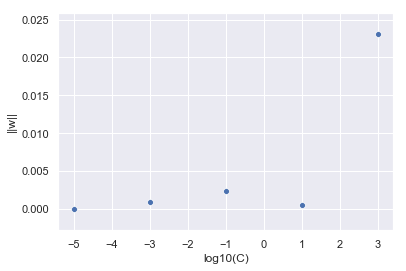

In [5]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
df=pd.DataFrame({'log10(C)': Clist, '||w||': w})
ax = sns.scatterplot(x='log10(C)', y='||w||',data=df)
